In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from pathlib import Path

In [2]:
data_path = Path(os.getcwd()).parent.joinpath("data")
assert data_path.exists()

coco_metadata_spacy_p = data_path.joinpath("coco_metadata_spacy.df.feather")
coco_metadata_nltk_p = data_path.joinpath("coco_metadata_nltk.df.feather")
coco_metadata_polyglot_p = data_path.joinpath("coco_metadata_polyglot.df.feather")
assert coco_metadata_spacy_p.exists()
assert coco_metadata_nltk_p.exists()
assert coco_metadata_polyglot_p.exists()

In [3]:
coco_metadata_spacy = pd.read_feather(coco_metadata_spacy_p)
print(len(coco_metadata_spacy))
coco_metadata_nltk = pd.read_feather(coco_metadata_nltk_p)
print(len(coco_metadata_nltk))
coco_metadata_polyglot = pd.read_feather(coco_metadata_polyglot_p)
print(len(coco_metadata_polyglot))

cc = {'s': coco_metadata_spacy, 'n': coco_metadata_nltk, 'p': coco_metadata_polyglot}

616767
616767
616767


In [4]:
wikicaps_metadata_spacy_p = data_path.joinpath("wikicaps_metadata_spacy.df.feather") 
wikicaps_metadata_nltk_p = data_path.joinpath("wikicaps_metadata_nltk.df.feather")
wikicaps_metadata_polyglot_p = data_path.joinpath("wikicaps_metadata_polyglot.df.feather")
wikicaps_data_p = data_path.joinpath("v1/complete.df.feather")
assert wikicaps_data_p.exists()
wikicaps_data = pd.read_feather(wikicaps_data_p)[['wikicaps_id', 'wikimedia_file', 'caption']]
wikicaps_data.to_feather(wikicaps_data_p)
print(wikicaps_data.columns)

Index(['wikicaps_id', 'wikimedia_file', 'caption'], dtype='object')


In [5]:
wikicaps_metadata_spacy = pd.read_feather(wikicaps_metadata_spacy_p)
print(len(wikicaps_metadata_spacy))
wikicaps_metadata_nltk = pd.read_feather(wikicaps_metadata_nltk_p)
print(len(wikicaps_metadata_nltk))
wikicaps_metadata_polyglot = pd.read_feather(wikicaps_metadata_polyglot_p)
print(len(wikicaps_metadata_polyglot))

wc = {'s': wikicaps_metadata_spacy, 'n': wikicaps_metadata_nltk, 'p': wikicaps_metadata_polyglot}

187598
187598
187598


In [6]:
import sys
sys.path.append('..')
from utils import generate_caption_stats

# Generate metadata for WIKICAPS WITH SPACY

In [31]:
pos_tags_stats = True
readability_scores = False
n_spacy_workers = 8
backend='spacy'

wc['s'] = generate_caption_stats(wikicaps_data, pos_tags_stats, readability_scores, n_spacy_workers, backend=backend)
wc['s'].to_feather(wikicaps_metadata_spacy_p)

2021-01-25 21:12:15.750 | INFO     | utils:generate_caption_stats:146 - Generating caption statistics using SPACY...
100%|██████████| 187598/187598 [06:03<00:00, 516.39it/s]
2021-01-25 21:18:19.912 | INFO     | utils:generate_caption_stats:519 - Finished adding caption statistics in 364.1609239578247 seconds!


# Generate metadata for WIKICAPS WITH NLTK

In [32]:
pos_tags_stats = True
readability_scores = False
n_spacy_workers = 8
backend='nltk'

wc['n'] = generate_caption_stats(wikicaps_data, pos_tags_stats, readability_scores, n_spacy_workers, backend=backend)
wc['n'].to_feather(wikicaps_metadata_nltk_p)

2021-01-25 21:18:21.011 | INFO     | utils:generate_caption_stats:146 - Generating caption statistics using NLTK...
  0%|          | 0/187598 [00:00<?, ?it/s][nltk_data] Downloading package punkt to /home/p0w3r/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading word: Package 'word' not found in index
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/p0w3r/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/p0w3r/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package universal_treebanks_v20 to
[nltk_data]     /home/p0w3r/nltk_data...
[nltk_data]   Package universal_treebanks_v20 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/p0w3r/nltk_data...
[nltk_data]   Package maxent_ne_chunker is alre

# Generate metadata for WIKICAPS WITH POLYGLOT

In [33]:
pos_tags_stats = True
readability_scores = False
n_spacy_workers = 8
backend='polyglot'

wc['p'] = generate_caption_stats(wikicaps_data, pos_tags_stats, readability_scores, n_spacy_workers, backend=backend)
wc['p'].to_feather(wikicaps_metadata_polyglot_p)

2021-01-25 22:01:13.166 | INFO     | utils:generate_caption_stats:146 - Generating caption statistics using POLYGLOT...
  0%|          | 7/187598 [00:00<50:58, 61.33it/s]

[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]     /home/p0w3r/polyglot_data...
[polyglot_data]   Package embeddings2.en is already up-to-date!
[polyglot_data] Downloading package ner2.en to
[polyglot_data]     /home/p0w3r/polyglot_data...
[polyglot_data]   Package ner2.en is already up-to-date!
[polyglot_data] Downloading package pos2.en to
[polyglot_data]     /home/p0w3r/polyglot_data...
[polyglot_data]   Package pos2.en is already up-to-date!


  0%|          | 34/187598 [00:00<1:04:09, 48.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  0%|          | 594/187598 [00:10<54:40, 57.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  0%|          | 641/187598 [00:11<54:01, 57.68it/s]  Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  0%|          | 682/187598 [00:11<51:10, 60.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  0%|          | 810/187598 [00:14<58:08, 53.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 2110/187598 [00:37<1:04:37, 47.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 2136/187598 [00:3

  1%|          | 2232/187598 [00:39<49:36, 62.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|▏         | 2674/187598 [00:47<46:44, 65.94it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|▏         | 2747/187598 [00:48<48:37, 63.36it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  2%|▏         | 3087/187598 [00:54<48:03, 64.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  2%|▏         | 3175/187598 [00:55<50:22, 61.01it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  2%|▏         | 3558/187598 [01:02<47:02, 65.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  2%|▏         | 3751/187598 [01:0

  3%|▎         | 4958/187598 [01:26<52:52, 57.58it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 5156/187598 [01:29<1:00:37, 50.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 5188/187598 [01:30<56:52, 53.46it/s]  Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 5627/187598 [01:37<54:08, 56.01it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 5772/187598 [01:39<52:16, 57.98it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 6011/187598 [01:43<52:37, 57.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 6017/187598 [

  5%|▍         | 8613/187598 [02:28<51:19, 58.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▍         | 8870/187598 [02:32<59:46, 49.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▍         | 9161/187598 [02:37<50:58, 58.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▌         | 9640/187598 [02:45<51:27, 57.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▌         | 9727/187598 [02:46<40:13, 73.71it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▌         | 9763/187598 [02:47<50:53, 58.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▌         | 9783/187598 [02:4

  6%|▌         | 10890/187598 [03:06<49:35, 59.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▌         | 11026/187598 [03:08<43:36, 67.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▌         | 11098/187598 [03:10<44:08, 66.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▌         | 11556/187598 [03:17<47:04, 62.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▌         | 11705/187598 [03:20<49:26, 59.28it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  7%|▋         | 12678/187598 [03:37<58:23, 49.92it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  7%|▋         | 12732/18759

  8%|▊         | 15564/187598 [04:25<49:01, 58.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  8%|▊         | 15928/187598 [04:31<47:30, 60.23it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  9%|▉         | 16835/187598 [04:46<47:44, 59.61it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  9%|▉         | 17035/187598 [04:50<48:58, 58.04it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  9%|▉         | 17222/187598 [04:53<48:29, 58.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|▉         | 17959/187598 [05:05<44:51, 63.02it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|▉         | 18270/18759

 10%|█         | 19495/187598 [05:31<42:57, 65.22it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 11%|█         | 19935/187598 [05:38<48:23, 57.74it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 11%|█         | 19990/187598 [05:39<46:00, 60.71it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 11%|█         | 20587/187598 [05:50<51:20, 54.22it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 11%|█         | 20905/187598 [05:55<44:19, 62.69it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 11%|█         | 20976/187598 [05:56<44:26, 62.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 11%|█▏        | 21291/18759

 12%|█▏        | 23282/187598 [06:35<46:53, 58.41it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 12%|█▏        | 23445/187598 [06:38<42:36, 64.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 13%|█▎        | 23605/187598 [06:41<49:56, 54.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 13%|█▎        | 24061/187598 [06:48<50:07, 54.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 13%|█▎        | 24297/187598 [06:52<46:46, 58.18it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 13%|█▎        | 24304/187598 [06:53<48:59, 55.56it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 13%|█▎        | 24612/18759

 14%|█▍        | 26251/187598 [07:25<39:39, 67.80it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▍        | 26359/187598 [07:27<43:52, 61.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▍        | 26520/187598 [07:30<50:32, 53.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▍        | 26606/187598 [07:31<49:22, 54.34it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▍        | 26846/187598 [07:35<42:28, 63.09it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 15%|█▍        | 27377/187598 [07:44<41:17, 64.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 15%|█▍        | 27573/18759

 16%|█▌        | 29751/187598 [08:25<40:32, 64.89it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▋        | 30554/187598 [08:39<54:42, 47.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▋        | 30685/187598 [08:41<49:16, 53.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▋        | 30883/187598 [08:44<45:42, 57.13it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 17%|█▋        | 31707/187598 [08:59<40:49, 63.65it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 17%|█▋        | 31715/187598 [08:59<39:05, 66.46it/s]Detector is not able to detect the language reliably.


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 17%|█▋        | 32012/187598 [09:04<46:03, 56.29it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 17%|█▋        | 32035/187598 [09:04<39:25, 65.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 33146/187598 [09:23<43:02, 59.82it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 33234/187598 [09:25<43:30, 59.14it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 33297/187598 [09:26<41:13, 62.39it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 33342/187598 [09:27<46:27, 55.33it/s]Detector is not able to dete

 18%|█▊        | 33750/187598 [09:34<51:06, 50.17it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 33835/187598 [09:35<40:31, 63.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 34185/187598 [09:42<44:26, 57.53it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 34215/187598 [09:42<43:37, 58.61it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 34703/187598 [09:50<46:59, 54.22it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 19%|█▊        | 34830/187598 [09:52<37:43, 67.49it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 19%|█▊        | 34837/18759

 20%|██        | 37897/187598 [10:45<36:19, 68.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 20%|██        | 38088/187598 [10:48<41:02, 60.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 20%|██        | 38398/187598 [10:53<46:05, 53.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 20%|██        | 38446/187598 [10:54<41:26, 59.98it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 21%|██        | 38536/187598 [10:56<42:53, 57.91it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 21%|██        | 38603/187598 [10:57<39:35, 62.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 21%|██        | 38612/18759

 22%|██▏       | 40915/187598 [11:37<40:22, 60.54it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 22%|██▏       | 41447/187598 [11:46<39:45, 61.28it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 22%|██▏       | 41919/187598 [11:54<43:20, 56.01it/s]Detector is not able to detect the language reliably.


 22%|██▏       | 41940/187598 [11:54<42:20, 57.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 23%|██▎       | 42355/187598 [12:01<40:16, 60.10it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 23%|██▎       | 42489/187598 [12:03<40:48, 59.26it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 23%|██▎       | 42610/187598 [12:05<44:54, 53.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 23%|██▎       | 42790/187598 [12:08<36:03, 66.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 23%|██▎       | 42949/187598 [12:11<44:41, 53.94it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 23%|██▎       | 43028/18759

 25%|██▍       | 46100/187598 [13:06<34:03, 69.23it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 25%|██▍       | 46301/187598 [13:09<41:51, 56.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 25%|██▌       | 47011/187598 [13:21<39:14, 59.71it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 25%|██▌       | 47101/187598 [13:23<43:50, 53.41it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 25%|██▌       | 47155/187598 [13:24<42:21, 55.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 25%|██▌       | 47644/187598 [13:33<40:30, 57.57it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 25%|██▌       | 47712/18759

 26%|██▌       | 48676/187598 [13:50<40:18, 57.43it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 26%|██▌       | 49081/187598 [13:57<47:35, 48.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 26%|██▌       | 49105/187598 [13:57<38:12, 60.40it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 27%|██▋       | 50183/187598 [14:16<44:40, 51.26it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 27%|██▋       | 50548/187598 [14:23<34:30, 66.21it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 27%|██▋       | 51358/187598 [14:36<38:31, 58.94it/s]Detector is not able to dete

 28%|██▊       | 53332/187598 [15:10<42:54, 52.15it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 28%|██▊       | 53345/187598 [15:10<41:48, 53.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▊       | 53732/187598 [15:17<48:44, 45.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▊       | 53871/187598 [15:19<36:19, 61.34it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▉       | 53967/187598 [15:21<36:26, 61.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▉       | 54314/187598 [15:27<39:13, 56.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▉       | 54458/18759

 29%|██▉       | 54589/187598 [15:32<45:24, 48.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▉       | 54618/187598 [15:32<46:38, 47.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▉       | 54855/187598 [15:37<43:17, 51.10it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|██▉       | 55458/187598 [15:47<39:52, 55.22it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|██▉       | 55664/187598 [15:51<38:35, 56.97it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|██▉       | 55712/187598 [15:52<45:34, 48.23it/s]Detector is not able to detect the language reliably.
Detector is not able to dete

 31%|███▏      | 59072/187598 [16:49<33:19, 64.26it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 32%|███▏      | 59690/187598 [17:00<35:38, 59.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 32%|███▏      | 59856/187598 [17:03<34:59, 60.83it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 32%|███▏      | 60088/187598 [17:07<35:32, 59.80it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 32%|███▏      | 60124/187598 [17:07<35:31, 59.82it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 32%|███▏      | 60252/187598 [17:09<33:53, 62.64it/s]Detector is not able to detect the language reliably.
Detector is not able to dete

 33%|███▎      | 61175/187598 [17:25<44:56, 46.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 61461/187598 [17:30<37:03, 56.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 61688/187598 [17:34<36:58, 56.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 61837/187598 [17:36<38:55, 53.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 62701/187598 [17:51<31:50, 65.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 62760/187598 [17:52<36:44, 56.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 62833/18759

Detector is not able to detect the language reliably.
 34%|███▍      | 63364/187598 [18:03<32:04, 64.56it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 34%|███▍      | 63862/187598 [18:11<33:07, 62.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 34%|███▍      | 63976/187598 [18:13<30:11, 68.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 34%|███▍      | 64339/187598 [18:19<34:44, 59.13it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 34%|███▍      | 64450/187598 [18:21<32:07, 63.90it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 34%|███▍      | 64495/187598 [18:22<33:06, 61.96it/s]Detector is not able to detect the language reliably.
Detector is not able to dete

 36%|███▌      | 67321/187598 [19:12<31:47, 63.06it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▌      | 67564/187598 [19:15<31:30, 63.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▌      | 67662/187598 [19:17<32:59, 60.60it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▋      | 68264/187598 [19:27<30:11, 65.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 37%|███▋      | 69228/187598 [19:44<32:14, 61.19it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 37%|███▋      | 69258/187598 [19:45<32:05, 61.47it/s]Detector is not able to detect the language reliably.


 37%|███▋      | 69614/187598 [19:50<33:16, 59.09it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 37%|███▋      | 70003/187598 [19:57<32:44, 59.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 37%|███▋      | 70272/187598 [20:01<32:41, 59.80it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 37%|███▋      | 70280/187598 [20:02<31:23, 62.28it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 38%|███▊      | 71554/187598 [20:23<34:14, 56.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 38%|███▊      | 71578/187598 [20:23<30:41, 62.99it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.


 38%|███▊      | 71736/187598 [20:26<30:48, 62.68it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 38%|███▊      | 71930/187598 [20:29<33:44, 57.15it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▊      | 72334/187598 [20:36<31:16, 61.43it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▊      | 72692/187598 [20:42<31:52, 60.09it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▉      | 73285/187598 [20:53<33:00, 57.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▉      | 73300/187598 [20:53<29:19, 64.97it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▉      | 73423/18759

Detector is not able to detect the language reliably.
 39%|███▉      | 73671/187598 [20:59<34:41, 54.74it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▉      | 73756/187598 [21:01<41:08, 46.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|███▉      | 74415/187598 [21:12<31:18, 60.26it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|███▉      | 74427/187598 [21:12<26:54, 70.10it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|███▉      | 74496/187598 [21:14<31:21, 60.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|███▉      | 74628/187598 [21:16<38:20, 49.11it/s]Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
 40%|████      | 75307/187598 [21:28<33:17, 56.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|████      | 75810/187598 [21:37<33:45, 55.19it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 41%|████      | 76029/187598 [21:41<38:09, 48.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 41%|████      | 76065/187598 [21:41<36:05, 51.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 41%|████      | 76188/187598 [21:43<31:29, 58.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 41%|████      | 76266/187598 [21:45<28:24, 65.32it/s]Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
 42%|████▏     | 79530/187598 [22:41<33:23, 53.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     | 79639/187598 [22:43<24:59, 72.01it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 43%|████▎     | 79818/187598 [22:46<29:23, 61.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 43%|████▎     | 80052/187598 [22:51<31:15, 57.35it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 43%|████▎     | 80058/187598 [22:51<32:50, 54.59it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 43%|████▎     | 80238/187598 [22:54<32:31, 55.00it/s]Detector is not able to detect the language reliably.
Detector is not able to dete

 44%|████▍     | 83219/187598 [23:46<32:14, 53.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 44%|████▍     | 83246/187598 [23:46<30:46, 56.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 45%|████▍     | 83639/187598 [23:53<27:39, 62.65it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 45%|████▍     | 83841/187598 [23:57<28:48, 60.04it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 45%|████▍     | 83945/187598 [23:58<33:23, 51.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 45%|████▌     | 84545/187598 [24:09<30:56, 55.52it/s]Detector is not able to detect the language reliably.
Detector is not able to dete

 46%|████▌     | 85497/187598 [24:25<26:35, 63.98it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 46%|████▌     | 85953/187598 [24:33<26:34, 63.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 46%|████▌     | 86167/187598 [24:36<27:26, 61.59it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 46%|████▌     | 86353/187598 [24:39<25:29, 66.22it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 46%|████▌     | 86515/187598 [24:42<30:49, 54.67it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 46%|████▌     | 86630/187598 [24:45<31:15, 53.83it/s]Detector is not able to detect the language reliably.
Detector is not able to dete

 48%|████▊     | 89350/187598 [25:31<28:36, 57.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 89424/187598 [25:32<25:22, 64.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 89655/187598 [25:36<26:25, 61.76it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 89732/187598 [25:37<27:30, 59.31it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 89950/187598 [25:41<35:33, 45.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 90032/187598 [25:42<29:33, 55.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 90355/18759

 49%|████▊     | 91045/187598 [26:00<27:37, 58.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 49%|████▉     | 91938/187598 [26:15<27:41, 57.57it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 49%|████▉     | 92203/187598 [26:20<28:46, 55.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 49%|████▉     | 92357/187598 [26:23<29:22, 54.03it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 49%|████▉     | 92410/187598 [26:24<25:55, 61.19it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 50%|████▉     | 92918/187598 [26:33<29:13, 53.99it/s]Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
 51%|█████     | 95673/187598 [27:20<27:36, 55.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 51%|█████     | 96036/187598 [27:26<23:27, 65.03it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 51%|█████▏    | 96609/187598 [27:36<25:15, 60.04it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 96914/187598 [27:41<25:32, 59.18it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 97029/187598 [27:43<26:21, 57.28it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 97211/187598 [27:47<25:54, 58.16it/s]Detector is not able to detect the language reliably.
Detector is not able to dete

 52%|█████▏    | 97798/187598 [27:57<22:04, 67.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 98216/187598 [28:04<27:48, 53.58it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 53%|█████▎    | 98748/187598 [28:13<21:16, 69.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 53%|█████▎    | 99206/187598 [28:21<29:06, 50.62it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 53%|█████▎    | 99404/187598 [28:25<22:41, 64.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 53%|█████▎    | 99691/187598 [28:30<27:46, 52.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 53%|█████▎    | 99697/18759

 53%|█████▎    | 99712/187598 [28:30<25:40, 57.05it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 53%|█████▎    | 100159/187598 [28:38<24:15, 60.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▎    | 100557/187598 [28:44<20:28, 70.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▎    | 100638/187598 [28:46<25:57, 55.83it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▍    | 101001/187598 [28:52<23:26, 61.56it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▍    | 101963/187598 [29:09<23:38, 60.38it/s]Detector is not able to detect the language reliably.


 54%|█████▍    | 102055/187598 [29:10<25:05, 56.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▍    | 102106/187598 [29:11<28:22, 50.21it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▍    | 102189/187598 [29:13<26:01, 54.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▍    | 102227/187598 [29:13<22:53, 62.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 55%|█████▍    | 102472/187598 [29:17<20:33, 69.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 55%|█████▍    | 102622/187598 [29:20<26:55, 52.61it/s]Detector is not able t

 56%|█████▌    | 104329/187598 [29:49<23:14, 59.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▌    | 104622/187598 [29:54<22:08, 62.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▌    | 104870/187598 [29:58<27:16, 50.54it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▌    | 104973/187598 [30:00<29:26, 46.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▌    | 105493/187598 [30:10<24:04, 56.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▌    | 105508/187598 [30:10<22:46, 60.08it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▋    | 10572

 57%|█████▋    | 106059/187598 [30:19<26:15, 51.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 106073/187598 [30:20<24:22, 55.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 106611/187598 [30:29<28:35, 47.22it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 107097/187598 [30:38<23:04, 58.13it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 107372/187598 [30:42<23:29, 56.94it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 107729/187598 [30:48<22:16, 59.77it/s]Detector is not able to detect the language reliably.


 57%|█████▋    | 107789/187598 [30:49<23:16, 57.14it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 107924/187598 [30:52<22:33, 58.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 108562/187598 [31:03<24:21, 54.08it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 59%|█████▊    | 109779/187598 [31:23<22:29, 57.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 59%|█████▊    | 110108/187598 [31:29<22:07, 58.36it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 59%|█████▉    | 110249/187598 [31:31<20:26, 63.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 59%|█████▉    | 11047

 60%|█████▉    | 112049/187598 [32:02<25:42, 48.97it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|█████▉    | 112119/187598 [32:03<20:13, 62.21it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|█████▉    | 112280/187598 [32:06<18:57, 66.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|██████    | 112974/187598 [32:17<20:59, 59.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|██████    | 113297/187598 [32:23<22:24, 55.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 61%|██████    | 114054/187598 [32:36<23:49, 51.43it/s]Detector is not able to detect the language reliably.


 61%|██████    | 114699/187598 [32:47<21:03, 57.68it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 115381/187598 [32:58<18:20, 65.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 115932/187598 [33:08<20:42, 57.67it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 115975/187598 [33:08<22:26, 53.19it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 116336/187598 [33:15<21:04, 56.36it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 116398/187598 [33:16<23:15, 51.02it/s]Detector is not able to detect the language reliably.


 62%|██████▏   | 116501/187598 [33:18<22:49, 51.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 116618/187598 [33:20<20:31, 57.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 116638/187598 [33:21<26:07, 45.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 117067/187598 [33:28<18:41, 62.89it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 117212/187598 [33:31<22:01, 53.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 63%|██████▎   | 117837/187598 [33:41<20:20, 57.15it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 63%|██████▎   | 11794

 64%|██████▍   | 120484/187598 [34:27<15:54, 70.30it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 64%|██████▍   | 120852/187598 [34:33<17:45, 62.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 65%|██████▍   | 121169/187598 [34:39<17:28, 63.35it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 65%|██████▍   | 121288/187598 [34:41<19:58, 55.32it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 65%|██████▍   | 121301/187598 [34:42<22:24, 49.30it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 65%|██████▌   | 122368/187598 [35:00<16:48, 64.65it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 65%|██████▌   | 12254

 66%|██████▋   | 124647/187598 [35:39<17:43, 59.17it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 67%|██████▋   | 125173/187598 [35:48<20:05, 51.78it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 67%|██████▋   | 125448/187598 [35:53<18:48, 55.05it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 67%|██████▋   | 125945/187598 [36:01<17:04, 60.19it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 67%|██████▋   | 126129/187598 [36:05<22:24, 45.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 126693/187598 [36:14<16:47, 60.45it/s]Detector is not able to detect the language reliably.


Detector is not able to detect the language reliably.
 68%|██████▊   | 126869/187598 [36:17<17:40, 57.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 126905/187598 [36:18<17:15, 58.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 126984/187598 [36:19<17:32, 57.60it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 127356/187598 [36:25<15:17, 65.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 127370/187598 [36:25<16:10, 62.04it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 127469/187598 [36:27<15:53, 63.03it/s]Detector is not able to detect the language reliably.
Detector is not able t

 69%|██████▊   | 128561/187598 [36:46<16:43, 58.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▊   | 128600/187598 [36:46<15:16, 64.39it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▊   | 128635/187598 [36:47<17:21, 56.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▊   | 128817/187598 [36:50<16:25, 59.65it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▉   | 129112/187598 [36:55<17:17, 56.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▉   | 129341/187598 [36:59<15:45, 61.59it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▉   | 12935

 69%|██████▉   | 130363/187598 [37:18<18:32, 51.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 70%|██████▉   | 130514/187598 [37:20<15:29, 61.41it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 70%|██████▉   | 130949/187598 [37:28<18:36, 50.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 70%|██████▉   | 131124/187598 [37:31<19:00, 49.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 70%|███████   | 131697/187598 [37:41<17:47, 52.35it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 70%|███████   | 131732/187598 [37:42<14:36, 63.77it/s]Detector is not able to detect the language reliably.
Detector is not able t

 71%|███████   | 132997/187598 [38:04<15:54, 57.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 71%|███████   | 133543/187598 [38:13<15:14, 59.09it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 71%|███████▏  | 133693/187598 [38:16<16:34, 54.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 71%|███████▏  | 133805/187598 [38:18<16:14, 55.17it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 71%|███████▏  | 133911/187598 [38:20<14:17, 62.58it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 72%|███████▏  | 134244/187598 [38:26<16:33, 53.69it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 72%|███████▏  | 13455

 73%|███████▎  | 136298/187598 [39:01<16:11, 52.78it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 73%|███████▎  | 136346/187598 [39:02<13:12, 64.67it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 73%|███████▎  | 136424/187598 [39:03<16:25, 51.90it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 73%|███████▎  | 136564/187598 [39:06<13:26, 63.32it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 73%|███████▎  | 136821/187598 [39:10<16:15, 52.04it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 73%|███████▎  | 137154/187598 [39:15<13:28, 62.39it/s]Detector is not able to detect the language reliably.
Detector is not able t

 75%|███████▍  | 140268/187598 [40:10<11:56, 66.10it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 75%|███████▍  | 140301/187598 [40:10<12:19, 63.92it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 75%|███████▍  | 140334/187598 [40:11<14:03, 56.03it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 75%|███████▌  | 141014/187598 [40:22<15:55, 48.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 75%|███████▌  | 141181/187598 [40:25<11:50, 65.31it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 75%|███████▌  | 141341/187598 [40:28<12:09, 63.40it/s]Detector is not able to detect the language reliably.
Detector is not able t

Detector is not able to detect the language reliably.
 76%|███████▌  | 142305/187598 [40:44<12:53, 58.53it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▌  | 142433/187598 [40:46<11:41, 64.39it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▌  | 142475/187598 [40:47<12:08, 61.97it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 143586/187598 [41:06<14:00, 52.34it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 143625/187598 [41:06<11:17, 64.94it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 143927/187598 [41:12<12:24, 58.66it/s]Detector is not able to detect the language reliably.
Detector is not able t

 78%|███████▊  | 146478/187598 [41:56<10:31, 65.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 78%|███████▊  | 146680/187598 [42:00<12:32, 54.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 78%|███████▊  | 147052/187598 [42:06<09:27, 71.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 78%|███████▊  | 147141/187598 [42:07<14:07, 47.76it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 79%|███████▊  | 147284/187598 [42:10<10:59, 61.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 79%|███████▊  | 147393/187598 [42:12<11:58, 55.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able t

 79%|███████▉  | 148683/187598 [42:34<09:22, 69.22it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 79%|███████▉  | 148868/187598 [42:37<10:47, 59.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 80%|███████▉  | 149481/187598 [42:48<13:19, 47.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 80%|███████▉  | 149647/187598 [42:51<10:25, 60.69it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 80%|███████▉  | 149667/187598 [42:51<11:50, 53.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 80%|███████▉  | 149859/187598 [42:55<10:06, 62.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able t

 80%|████████  | 150939/187598 [43:13<09:28, 64.49it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 80%|████████  | 150997/187598 [43:14<10:31, 57.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 81%|████████  | 151021/187598 [43:14<10:24, 58.54it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 81%|████████  | 151181/187598 [43:17<08:55, 68.06it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 81%|████████  | 151240/187598 [43:18<09:37, 62.98it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 81%|████████  | 151606/187598 [43:25<10:21, 57.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 81%|████████  | 15163

 83%|████████▎ | 155170/187598 [44:25<09:02, 59.76it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 155179/187598 [44:25<08:36, 62.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 155301/187598 [44:27<10:21, 51.96it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 155337/187598 [44:28<08:42, 61.76it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 155708/187598 [44:34<08:56, 59.42it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 155754/187598 [44:35<09:53, 53.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 15580

Detector is not able to detect the language reliably.
 85%|████████▍ | 158808/187598 [45:29<09:24, 51.02it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 85%|████████▌ | 159509/187598 [45:41<09:17, 50.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 85%|████████▌ | 160376/187598 [45:57<06:58, 65.08it/s]Detector is not able to detect the language reliably.


 86%|████████▌ | 160397/187598 [45:57<07:38, 59.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 86%|████████▌ | 160575/187598 [46:01<08:33, 52.61it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 86%|████████▌ | 160672/187598 [46:02<07:06, 63.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 86%|████████▌ | 160883/187598 [46:06<09:13, 48.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 86%|████████▌ | 160941/187598 [46:07<08:24, 52.82it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 86%|████████▌ | 161378/187598 [46:15<08:17, 52.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 86%|████████▌ | 16141

 87%|████████▋ | 162788/187598 [46:39<07:05, 58.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 87%|████████▋ | 163040/187598 [46:43<07:17, 56.17it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 87%|████████▋ | 163135/187598 [46:45<07:13, 56.39it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 87%|████████▋ | 163290/187598 [46:47<06:12, 65.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 87%|████████▋ | 163765/187598 [46:55<06:16, 63.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 87%|████████▋ | 163888/187598 [46:57<06:55, 57.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able t

 89%|████████▉ | 166814/187598 [47:55<07:27, 46.43it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▉ | 166972/187598 [47:58<07:53, 43.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▉ | 167171/187598 [48:03<06:01, 56.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▉ | 167534/187598 [48:10<06:13, 53.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▉ | 167753/187598 [48:14<05:05, 64.97it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 90%|████████▉ | 167989/187598 [48:18<06:15, 52.25it/s]Detector is not able to detect the language reliably.
Detector is not able t

 90%|█████████ | 169157/187598 [48:40<05:06, 60.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 90%|█████████ | 169167/187598 [48:40<04:48, 63.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 90%|█████████ | 169222/187598 [48:41<05:07, 59.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 90%|█████████ | 169265/187598 [48:41<05:29, 55.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 90%|█████████ | 169353/187598 [48:43<05:02, 60.35it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 90%|█████████ | 169642/187598 [48:48<05:19, 56.17it/s]Detector is not able to detect the language reliably.
Detector is not able t

 93%|█████████▎| 174455/187598 [50:15<03:34, 61.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 93%|█████████▎| 174507/187598 [50:16<03:51, 56.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 93%|█████████▎| 174514/187598 [50:16<03:45, 58.01it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 93%|█████████▎| 174526/187598 [50:16<04:17, 50.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 93%|█████████▎| 174788/187598 [50:21<03:51, 55.26it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 93%|█████████▎| 174883/187598 [50:22<04:00, 52.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 93%|█████████▎| 17524

 95%|█████████▍| 177618/187598 [51:15<02:45, 60.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 95%|█████████▍| 177671/187598 [51:15<02:45, 60.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 95%|█████████▍| 177684/187598 [51:16<03:04, 53.69it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 95%|█████████▍| 178016/187598 [51:22<05:00, 31.94it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 95%|█████████▍| 178150/187598 [51:25<02:48, 56.15it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 95%|█████████▌| 178450/187598 [51:31<03:08, 48.43it/s]Detector is not able to detect the language reliably.
Detector is not able t

 97%|█████████▋| 181688/187598 [52:36<02:11, 44.99it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 97%|█████████▋| 181714/187598 [52:36<01:55, 50.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 97%|█████████▋| 181879/187598 [52:40<02:19, 40.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 97%|█████████▋| 182034/187598 [52:43<01:36, 57.43it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 97%|█████████▋| 182169/187598 [52:46<02:05, 43.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 97%|█████████▋| 182383/187598 [52:51<03:04, 28.20it/s]Detector is not able to detect the language reliably.
Detector is not able t

 99%|█████████▉| 185487/187598 [53:52<00:35, 59.26it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 99%|█████████▉| 185515/187598 [53:52<00:36, 56.99it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 99%|█████████▉| 185839/187598 [53:59<00:27, 62.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 99%|█████████▉| 185922/187598 [54:00<00:28, 59.03it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 99%|█████████▉| 186005/187598 [54:02<00:27, 57.67it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 99%|█████████▉| 186430/187598 [54:10<00:22, 51.50it/s]Detector is not able to detect the language reliably.
Detector is not able t

100%|██████████| 187598/187598 [54:46<00:00, 57.08it/s]


In [19]:
assert wikicaps_metadata_spacy_p.exists()
assert wikicaps_metadata_nltk_p.exists()
assert wikicaps_metadata_polyglot_p.exists()

wc['s'] = pd.read_feather(wikicaps_metadata_spacy_p)
wc['n'] = pd.read_feather(wikicaps_metadata_nltk_p)
wc['p'] = pd.read_feather(wikicaps_metadata_polyglot_p)

Index(['wikicaps_id', 'wikimedia_file', 'caption', 'num_tok', 'num_sent',
       'min_sent_len', 'max_sent_len', 'num_ne', 'ne_types', 'ne_texts',
       'num_propn', 'num_conj', 'num_verb', 'num_sym', 'num_num', 'num_adp',
       'num_adj', 'ratio_ne_tok', 'ratio_noun_tok', 'ratio_propn_tok',
       'ratio_all_noun_tok'],
      dtype='object')

# Generate missing num_nouns column in polyglot generated metadata

In [32]:
from polyglot.text import Text
from tqdm import tqdm
import regex
def gen_missing_n_nouns(dataframe):
    def gen_n_noun(df, pb):
        try:
            caption = str(df['caption']).encode('utf-8')
            # https://github.com/aboSamoor/polyglot/issues/71
            # removing "bad unicode" characters to avoid runtime exceptions
            # caption = str(caption, encoding='utf-8')
            caption = regex.sub(r"\p{C}", "", caption.decode('utf-8'))

            pg = Text(caption, hint_language_code='en')
            pg.language = 'en'
            n_noun = 0
            for pos in pg.pos_tags:
                if pos[1].upper() == 'NOUN':
                    n_noun += 1

            d = {'num_nouns': n_noun}
        except Exception as e:
            print(e)
            d = {'num_nouns': 0}
        finally:
            pb.update(1)
            return d
    with tqdm(total=len(dataframe)) as pbar:
        n_nouns = dataframe.apply(gen_n_noun, axis=1, result_type='expand', args=(pbar,))
        res = pd.concat([dataframe, n_nouns], axis=1)
        res.convert_dtypes()

        return res

# a = gen_missing_n_nouns(wc['p'])


In [33]:
print(a.columns)
print(len(a.columns))

Index(['wikicaps_id', 'wikimedia_file', 'caption', 'num_tok', 'num_sent',
       'min_sent_len', 'max_sent_len', 'num_ne', 'ne_types', 'ne_texts',
       'num_propn', 'num_conj', 'num_verb', 'num_sym', 'num_num', 'num_adp',
       'num_adj', 'ratio_ne_tok', 'ratio_noun_tok', 'ratio_propn_tok',
       'ratio_all_noun_tok', 'num_nouns'],
      dtype='object')
22


In [34]:
#wc['p'] = a

In [35]:
#wc['p'].to_feather(wikicaps_metadata_polyglot_p)

In [36]:
#b = gen_missing_n_nouns(cc['p'])
#print(b.columns)
#print(len(b.columns))

In [31]:
#cc['p'] = b
#cc['p'].to_feather(coco_metadata_polyglot_p)

# Common metadata structure for WikiCaps and COCO 


| ColumnId			| Description																| Datatype	|
|-------------------|---------------------------------------------------------------------------|-----------|
| caption			| Caption of the Image														| str		|
| num_tok			| Number of Tokens in the caption											| int		|
| num_sent			| Number of Sentences in the caption										| int		|
| min_sent_len		| Minimum number of Tokens in the Sentences of the caption					| int		|
| max_sent_len		| Maximum number of Tokens in the Sentences of the caption					| int		|
| num_ne			| Number of Named Entities in the caption									| int		|
| num_nouns			| Number of Tokens with NOUN POS Tag **										| int		|
| num_propn			| Number of Tokens with PROPN POS Tag **									| int		|
| num_conj			| Number of Tokens with CONJ POS Tag **										| int		|
| num_verb			| Number of Tokens with VERB POS Tag **										| int		|
| num_sym			| Number of Tokens with SYM POS Tag **										| int		|
| num_num			| Number of Tokens with NUM POS Tag **										| int		|
| num_adp			| Number of Tokens with ADP POS Tag **										| int		|
| num_adj			| Number of Tokens with ADJ POS Tag **										| int		|
| ratio_ne_tok		| Ratio of tokens associated with Named Entities vs all Tokens **			| int		|
| ratio_noun_tok	| Ratio of tokens tagged as NOUN vs all Tokens **							| int		|
| ratio_propn_tok	| Ratio of tokens tagged as PROPN vs all Tokens **							| int		|
| ratio_all_noun_tok| Ratio of tokens tagged as PROPN or NOUN vs all Tokens **					| int		|

# Compare
- min
- max
- median
- mean

of all columns except 'caption', 'ne_types', 'ne_texts'

In [6]:
relevant_cols = ['num_tok',
                 'num_sent',
                 'min_sent_len',
                 'max_sent_len',
                 'num_ne',
                 'num_nouns',
                 'num_propn',
                 'num_conj',
                 'num_verb',
                 'num_sym',
                 'num_num',
                 'num_adp',
                 'num_adj',
                 'ratio_ne_tok',
                 'ratio_noun_tok',
                 'ratio_propn_tok',
                 'ratio_all_noun_tok',
                 ]

min_coco_s = cc['s'][relevant_cols].min()
min_coco_n = cc['n'][relevant_cols].min()
min_coco_p = cc['p'][relevant_cols].min()

max_coco_s = cc['s'][relevant_cols].max()
max_coco_n = cc['n'][relevant_cols].max()
max_coco_p = cc['p'][relevant_cols].max()

mean_coco_s = cc['s'][relevant_cols].mean()
mean_coco_n = cc['n'][relevant_cols].mean()
mean_coco_p = cc['p'][relevant_cols].mean()

median_coco_s = cc['s'][relevant_cols].median()
median_coco_n = cc['n'][relevant_cols].median()
median_coco_p = cc['p'][relevant_cols].median()



min_wc_s = wc['s'][relevant_cols].min()
min_wc_n = wc['n'][relevant_cols].min()
min_wc_p = wc['p'][relevant_cols].min()

max_wc_s = wc['s'][relevant_cols].max()
max_wc_n = wc['n'][relevant_cols].max()
max_wc_p = wc['p'][relevant_cols].max()

mean_wc_s = wc['s'][relevant_cols].mean()
mean_wc_n = wc['n'][relevant_cols].mean()
mean_wc_p = wc['p'][relevant_cols].mean()

median_wc_s = wc['s'][relevant_cols].median()
median_wc_n = wc['n'][relevant_cols].median()
median_wc_p = wc['p'][relevant_cols].median()

In [120]:
compare_df = pd.DataFrame([min_coco_s, min_coco_n, min_coco_p,
                           min_wc_s, min_wc_n, min_wc_p,
                           max_coco_s, max_coco_n, max_coco_p,
                           max_wc_s, max_wc_n, max_wc_p,
                           mean_coco_s, mean_coco_n, mean_coco_p,
                           mean_wc_s, mean_wc_n, mean_wc_p,
                           median_coco_s, median_coco_n, median_coco_p,
                           median_wc_s, median_wc_n, median_wc_p],
                          index=['min_coco_spacy', 'min_coco_nltk', 'min_coco_polyglot',
                                 'min_wc_spacy', 'min_wc_nltk', 'min_wc_polyglot',
                                 'max_coco_spacy', 'max_coco_nltk', 'max_coco_polyglot',
                                 'max_wc_spacy', 'max_wc_nltk', 'max_wc_polyglot',
                                 'mean_coco_spacy', 'mean_coco_nltk', 'mean_coco_polyglot',
                                 'mean_wc_spacy', 'mean_wc_nltk', 'mean_wc_polyglot',
                                 'median_coco_spacy', 'median_coco_nltk', 'median_coco_polyglot',
                                 'median_wc_spacy', 'median_wc_nltk', 'median_wc_polyglot',                                 
                                ])
compare_df.head(24)

,num_tok,num_sent,min_sent_len,max_sent_len,num_ne,num_nouns,num_propn,num_conj,num_verb,num_sym,num_num,num_adp,num_adj,ratio_ne_tok,ratio_noun_tok,ratio_propn_tok,ratio_all_noun_tok
min_coco_spacy,7.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_coco_nltk,6.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_coco_polyglot,6.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_wc_spacy,12.000000,2.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_wc_nltk,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.047619
min_wc_polyglot,9.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max_coco_spacy,60.000000,6.000000,60.000000,60.000000,8.000000,24.000000,17.000000,0.000000,8.000000,2.000000,8.000000,14.000000,10.000000,1.000000,0.857143,1.000000,1.000000
max_coco_nltk,57.000000,3.000000,57.000000,57.000000,11.000000,24.000000,0.000000,5.000000,10.000000,0.000000,8.000000,14.000000,11.000000,0.714286,1.000000,0.000000,1.000000
max_coco_polyglot,57.000000,3.000000,57.000000,57.000000,5.000000,23.000000,8.000000,5.000000,10.000000,5.000000,7.000000,13.000000,10.000000,0.700000,0.857143,0.666667,0.857143
max_wc_spacy,149.000000,4.000000,71.000000,142.000000,43.000000,49.000000,90.000000,0.000000,22.000000,13.000000,24.000000,28.000000,31.000000,1.000000,0.666667,1.000000,1.000000


In [43]:
compare_df.reset_index().to_feather(data_path.joinpath('coco_vs_wikicaps_metadata.df.feather'))

# Plot Stuff

# Box Plots

ytick: 16.2


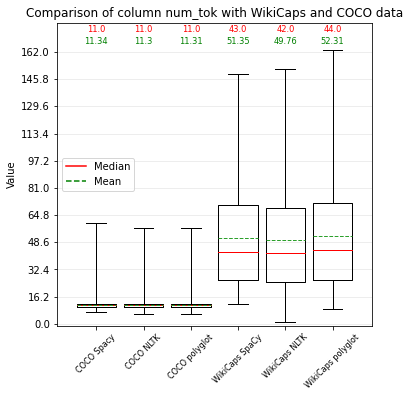

In [197]:
from matplotlib.lines import Line2D

def create_boxplot(cc, wc, column, figsize=None, title=None):
    pass
    fig, ax = plt.subplots(figsize=figsize)
    fig.subplots_adjust(left=0.075, right=0.95, top=0.95, bottom=0.25)
    
    data = [cc['s'][column], cc['n'][column], cc['p'][column],
            wc['s'][column], wc['n'][column], wc['p'][column]
           ]

    num_boxes = len(data)
    labels = ['COCO Spacy', 'COCO NLTK', 'COCO polyglot',
              'WikiCaps SpaCy', 'WikiCaps NLTK', 'WikiCaps polyglot']
    pos = .3 * np.arange(num_boxes)+1
    
    bp = ax.boxplot(data, 
                    vert=True, 
                    whis=[0, 100],
                    showfliers=False,
                    meanline=True,
                    showmeans=True,
                    widths=.25, 
                    positions=pos)
    
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red')
    
    # Add median + mean label
    medians = [cc[x][column].median() for x in list('snp')]
    medians += [wc[x][column].median() for x in list('snp')]
    medians = [str(np.round(s, 2)) for s in medians]
    
    means = [cc[x][column].mean() for x in list('snp')]
    means += [wc[x][column].mean() for x in list('snp')]
    means = [str(np.round(s, 2)) for s in means]
    
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        # median label
        ax.text(pos[tick], .97, medians[tick],
                           transform=ax.get_xaxis_transform(),
                           horizontalalignment='center', size='small', color='red')
        # mean label
        ax.text(pos[tick], .93, means[tick],
                         transform=ax.get_xaxis_transform(),
                         horizontalalignment='center', size='small', color='green')

    # add legend
    fake_legend_elements = [Line2D([0], [0], color='red', label='Median'), 
                            Line2D([0], [0], ls='--', color='green', label='Mean')]
    ax.legend(handles=fake_legend_elements, loc='center left')
    
    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)


    # Hide these grid behind plot objects
    ax.set_axisbelow(True)
    if title is None:
        title = f'Comparison of column {column} with WikiCaps and COCO data'
    ax.set_title(title)
    ax.set_ylabel('Value')


    #Set the axes ranges and axes labels
    ax.set_xticklabels(labels, rotation=45, fontsize=8)
    ax.set_xticks(pos)
    ax.set_xlim(pos.min() - .25, pos.max() + .25)
    
    maxx = max([cc[x][column].max() for x in list('snp')] + [wc[x][column].max() for x in list('snp')])
    minn = min([cc[x][column].min() for x in list('snp')] + [wc[x][column].min() for x in list('snp')])
    ytick = (maxx-minn) * .1
    ax.set_yticks(np.arange(0, maxx, ytick))
    ax.set_ylim(-1, maxx+ytick)
    print(f"ytick: {ytick}")
create_boxplot(cc, wc, 'num_tok', figsize = (5, 6))

In [198]:
wc['n'].iloc[wc['n']['num_tok'].idxmin()]['caption']

'Christmas-celebrations-at-Express-Avenue-Mall-Chennai-India-5'

ytick: 0.1


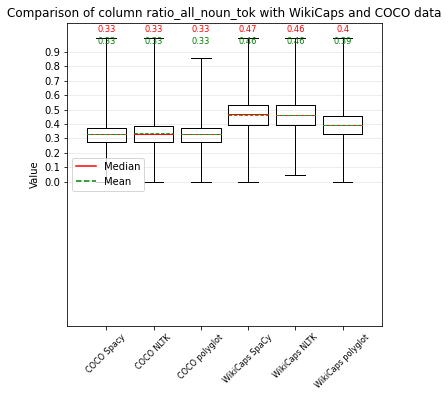

In [199]:
create_boxplot(cc, wc, 'ratio_all_noun_tok', figsize=(5,6))

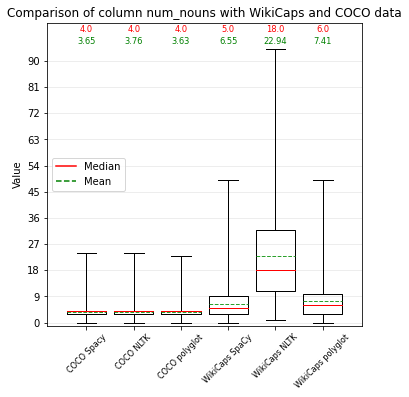

In [178]:

create_boxplot(cc, wc, 'num_nouns')